# EDA for Kaggle Dataset 


In [1]:
# Import required Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
# Load dataset
brainwave_df = pd.read_csv('eeg-brainwave-dataset-feeling-emotions//emotions.csv')

In [4]:
# Sample the dataset
brainwave_df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [5]:
brainwave_df.tail()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
2127,32.400,32.2,32.2,30.80,23.4,1.64,-2.03,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.2,47.2,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.20,1.09,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.8,-59.8,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.08,6.90,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.5,-10.5,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.46,1.58,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.0,-271.0,552.00,NEGATIVE
2131,27.000,32.0,31.8,25.00,28.9,4.99,1.95,6.210,3.490,-3.51,...,1.95,1.810,1.810,1.95,110.0,-6.71,22.8,22.8,-6.71,NEUTRAL


#### From the results above we see that the dataset has 2549 columns and the last one is the label. These are classified into 3 types Neutral, Positive and Negative

In [6]:
# Look at the shape of the dataset. Refer to experimental setup of Kaggle dataset for this reduced dimensionality
brainwave_df.shape

(2132, 2549)

In this dataset feature  selection  algorithms  were  run  to  generate  a  reduced dataset from  the  2,549  source attributes. 

In [7]:
# Check the datatype (all float64
brainwave_df.dtypes

# mean_0_a    float64
mean_1_a      float64
mean_2_a      float64
mean_3_a      float64
mean_4_a      float64
               ...   
fft_746_b     float64
fft_747_b     float64
fft_748_b     float64
fft_749_b     float64
label          object
Length: 2549, dtype: object

In [13]:
brainwave_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [8]:
# Look at the distribution of values for each column
brainwave_df.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

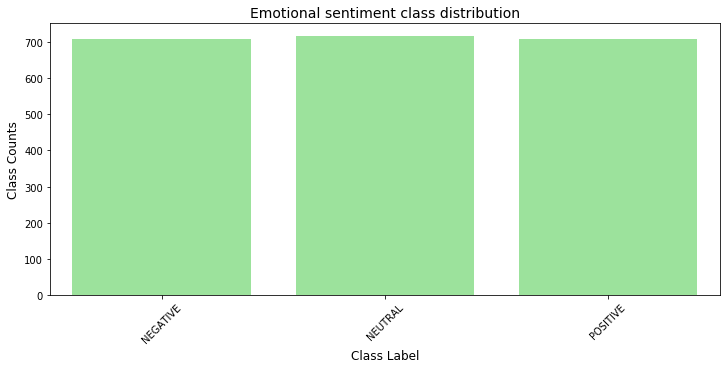

In [11]:
# We will check to see the distribution of this data across the 3 emotional states that we plan to evaluate by using a countplot

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,5))
sns.countplot(x=brainwave_df.label, color='lightgreen')
plt.title('Emotional sentiment class distribution', fontsize=14)
plt.ylabel('Class Counts', fontsize=12)
plt.xlabel('Class Label', fontsize=12)
plt.xticks(rotation='45')

The dataset has fairly even distribution of data across for the 3 emotions

In [15]:
# We Will use pandas’ function value_counts to see the exact number across the 3 types
brainwave_df['label'].value_counts()

NEUTRAL     716
POSITIVE    708
NEGATIVE    708
Name: label, dtype: int64

In [14]:
#Check the data for nulls
np.count_nonzero(brainwave_df.isnull())

0

No nulls were found in the prepared dataset